In [17]:
df = read.csv(file = '../National_Data/National_Data.csv')

In [18]:
head(df)

,yearid,fipscode,raceid,ageid,genderid,educationid,indicatorid,miscid,datasourceid,estimateid,SuppressID,datasetid,GeoLevel,Estimate,SeEstimate,LowerLimit,UpperLimit
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1980,-1,0,5,0,0,1,0,30,61,0,40,National,1,0.1,0.9,1.2
2,1980,-1,0,5,0,0,1,0,30,101,0,40,National,915,76,764,1065
3,1980,-1,0,6,0,0,1,0,3,61,0,3,National,5.4,0.3,4.8,6
4,1980,-1,0,6,0,0,1,0,3,101,0,3,National,2337,143,2054,2621
5,1980,-1,0,6,0,0,1,0,30,61,0,40,National,5.4,0.3,4.8,6
6,1980,-1,0,6,0,0,1,0,30,101,0,40,National,2337,143,2054,2621


# Looking At EstimateID
From the looks, this large dataset is actually not individually single entries. They are a mix of entries and summary statistics. This is prevelant from the "estimateid". 

A summary table below shows what you can filter by:
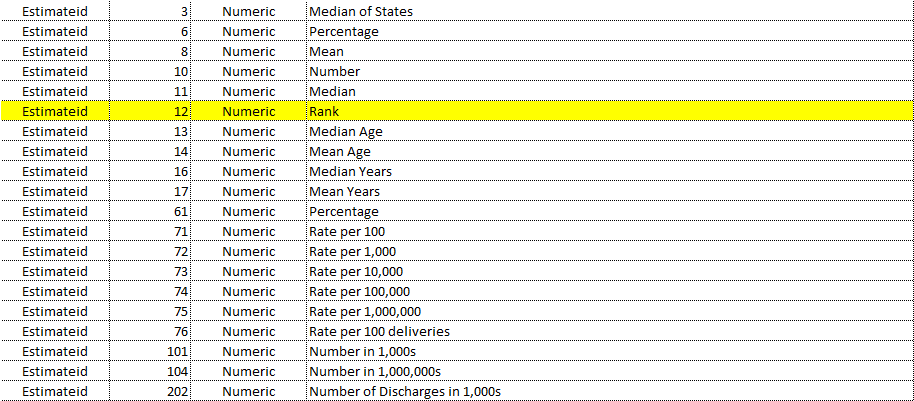

We can see the size of the sub-data groups by using a table: 

In [19]:
table(df$estimateid)


   6    8   10   11   13   14   16   17   61   71   72   73   74   75   76  101 
8870  216 1800   72  260  260  260  260 1596  100 6118 1822 1080 1152  512 1550 
 104  202 
 276 2898 

From looking at the counts, the largest record type is percentages. (Note, that size maybe smaller due to other statistics breaking it up). 

THOUGHT: I am a little worried this dataset maybe small due to the fact it is summary statistics with a large number of combinations. The combinations of features leads to a large number of rows. | This is just a thought right now. I haven't confirmed it.

# Looking At RaceID
for the dataset, we have the raceid column storing a number of integers. These integers represent a class of ethnicity. Below is a breakdown of them: 
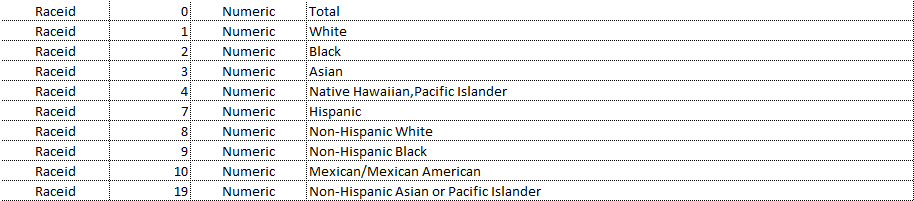


    0     1     2     3     4     7     8     9    10    19 
22862  1568  1568   988   200  1376   180   180    84    96 

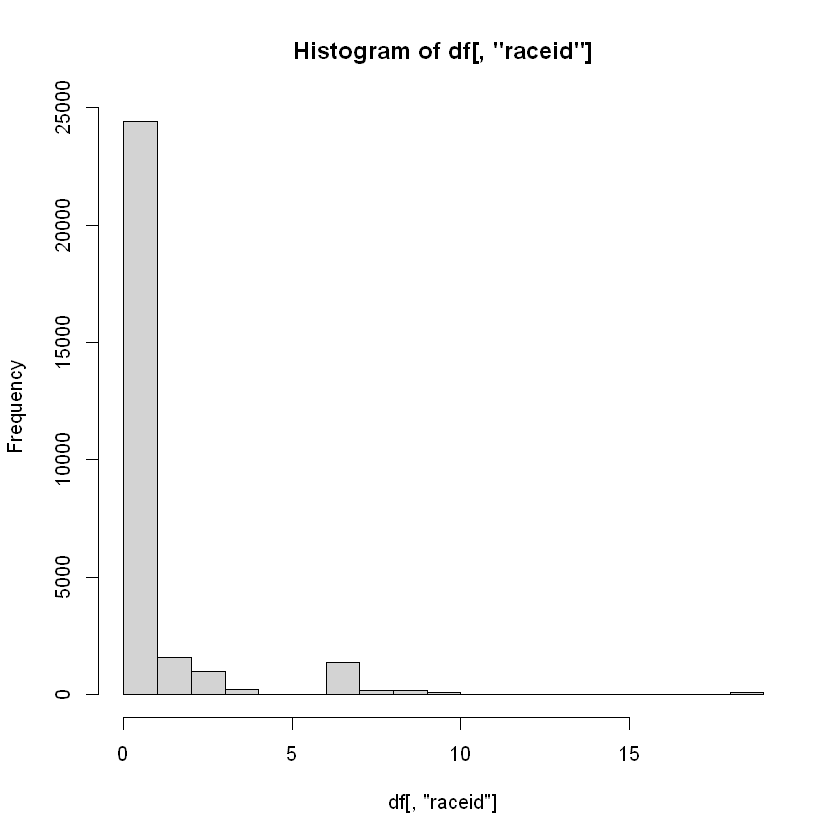

In [20]:
hist(df[,'raceid'])
table(df$raceid)

From the available dataset, there seems to be an equal representation of black and white people. 

THOUGHT: Data set could be skewed based on available samples. Good to choose something that may not be socially skewing the data.

# Looking At Indicatorid
The indicator column has the largest lookup table. I am unsure how it works yet.

# Explore Scenario

In [23]:
df_white = df[df$raceid==1,]

In [26]:
table(df_white$indicatorid)


  1   2   3   4   9  30  31  32  48  64  76  79 
228  76  40  40 200 200  40  40 160 288 216  40 

In [44]:
head(df_white[df_white$indicatorid==1,])

,yearid,fipscode,raceid,ageid,genderid,educationid,indicatorid,miscid,datasourceid,estimateid,SuppressID,datasetid,GeoLevel,Estimate,SeEstimate,LowerLimit,UpperLimit
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
44,1980,-1,1,99,0,0,1,0,3,61,0,3,National,2.4,0.1,2.3,2.7
45,1980,-1,1,99,0,0,1,0,3,101,0,3,National,4581,200,4185,4976
46,1980,-1,1,99,0,0,1,0,30,61,0,40,National,3.3,0.1,3.1,3.6
47,1980,-1,1,99,0,0,1,0,30,101,0,40,National,4528,200,4133,4923
48,1980,-1,1,100,0,0,1,0,3,61,0,3,National,2.6,0.1,2.4,2.8
49,1980,-1,1,100,0,0,1,0,30,61,0,40,National,3.5,0.1,3.2,3.7


In [51]:
df_white[df_white$indicatorid==1,]$estimateid

[1]  61 101  61 101  61  61  61 101  61 101  61  61  61 101  61 101  61  61
 [19]  61 101  61 101  61  61  61 101  61 101  61  61  61 101  61 101  61  61
 [37]  61 101  61 101  61  61  61 101  61 101  61  61  61 101  61 101  61  61
 [55]  61 101  61 101  61  61  61 101  61 101  61  61  61 101  61 101  61  61
 [73]  61 101  61 101  61  61  61 101  61 101  61  61  61 101  61 101  61  61
 [91]  61 101  61 101  61  61  61 101  61 101  61  61  61 101  61 101  61  61
[109]  61 101  61 101  61  61  61 101  61 101  61  61  61 101  61 101  61  61
[127]  61 101  61 101  61  61  61 101  61 101  61  61  61 101  61 101  61  61
[145]  61 101  61 101  61  61  61 101  61 101  61  61  61 101  61 101  61  61
[163]  61 101  61 101  61  61  61 101  61 101  61  61  61 101  61 101  61  61
[181]  61 101  61 101  61  61  61 101  61 101  61  61  61 101  61 101  61  61
[199]  61 101  61 101  61  61  61 101  61 101  61  61  61 101  61 101  61  61
[217]  61 101  61 101  61  61  61  61 101 101  61  61

There was a weird range of values in the estimate. This was due to not selecting an estimateid. 

From looking at the dataset of estimateid, we are best choosing percentages or numbers in 1000s as our estimate. 

In [54]:
df_white[df_white$indicatorid==1 & df_white$estimateid==61,]

,yearid,fipscode,raceid,ageid,genderid,educationid,indicatorid,miscid,datasourceid,estimateid,SuppressID,datasetid,GeoLevel,Estimate,SeEstimate,LowerLimit,UpperLimit
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
44,1980,-1,1,99,0,0,1,0,3,61,0,3,National,2.4,0.1,2.3,2.7
46,1980,-1,1,99,0,0,1,0,30,61,0,40,National,3.3,0.1,3.1,3.6
48,1980,-1,1,100,0,0,1,0,3,61,0,3,National,2.6,0.1,2.4,2.8
49,1980,-1,1,100,0,0,1,0,30,61,0,40,National,3.5,0.1,3.2,3.7
111,1981,-1,1,99,0,0,1,0,3,61,0,3,National,2.4,0.1,2.2,2.6
113,1981,-1,1,99,0,0,1,0,30,61,0,40,National,3.3,0.1,3,3.5
115,1981,-1,1,100,0,0,1,0,3,61,0,3,National,2.6,0.1,2.4,2.8
116,1981,-1,1,100,0,0,1,0,30,61,0,40,National,3.4,0.1,3.2,3.7
178,1982,-1,1,99,0,0,1,0,3,61,0,3,National,2.4,0.1,2.1,2.7


There seems to be a split between dataset id. 

I'll choose dataset from all ages 3.

In [55]:
df_white[df_white$indicatorid==1 & df_white$estimateid==61 & df_white$datasetid==3,]

,yearid,fipscode,raceid,ageid,genderid,educationid,indicatorid,miscid,datasourceid,estimateid,SuppressID,datasetid,GeoLevel,Estimate,SeEstimate,LowerLimit,UpperLimit
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
44,1980,-1,1,99,0,0,1,0,3,61,0,3,National,2.4,0.1,2.3,2.7
48,1980,-1,1,100,0,0,1,0,3,61,0,3,National,2.6,0.1,2.4,2.8
111,1981,-1,1,99,0,0,1,0,3,61,0,3,National,2.4,0.1,2.2,2.6
115,1981,-1,1,100,0,0,1,0,3,61,0,3,National,2.6,0.1,2.4,2.8
178,1982,-1,1,99,0,0,1,0,3,61,0,3,National,2.4,0.1,2.1,2.7
182,1982,-1,1,100,0,0,1,0,3,61,0,3,National,2.5,0.2,2.2,2.9
245,1983,-1,1,99,0,0,1,0,3,61,0,3,National,2.3,0.1,2.1,2.6
249,1983,-1,1,100,0,0,1,0,3,61,0,3,National,2.5,0.1,2.2,2.8
312,1984,-1,1,99,0,0,1,0,3,61,0,3,National,2.4,0.2,2.1,2.8


Age id flutuates between crude and age-adjusted to the 2000 US standard population. 

AMAZING: statistics are standardised by the 2000 US standard population. That means we could get numbers.

In [58]:
table(df_white[df_white$indicatorid==1 & df_white$estimateid==61 & df_white$datasetid==3,]$yearid)


1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 
   2    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2 
1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 
   2    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2 
2012 2013 2014 2015 2016 2017 
   2    2    2    2    2    2 

The 2 value could be from the crude and standardised record of the value. Lets choose standardised. 

In [59]:
table(df_white[df_white$indicatorid==1 & df_white$estimateid==61 & df_white$datasetid==3 & df_white$ageid==100,]$yearid)


1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
2012 2013 2014 2015 2016 2017 
   1    1    1    1    1    1 

Without trailing through all the data subsets, I presume we will get one unique value for each year from 1980 to 2017. 